In [2]:
from Bio import Entrez
import bs4 as bs
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import string
import os
import time

In [ ]:
#Verify Working Directory
#print(os.getcwd())

#Define Working Directory
#os.chdir('C:/')

In [3]:
#Provide E-mail
Entrez.email = '@gmail.com'

In [4]:
#Provide the directory of the file cointaining PMIDs
file_pmid = 'pmid-covid19-articles.txt'

In [5]:
#Save abstracts of the PMIDs contained in the txt
ab = []

def search_abstract(loc):
    file = open(loc, 'r')
    for pmid in file:
        handle = Entrez.efetch(db='pubmed', id=pmid, retmode='xml')
        soup = bs.BeautifulSoup(handle, 'xml')
        for i in soup.find_all('Abstract'):
            l = i.text
            ab.append(l.lower())
        

search_abstract(file_pmid)

In [7]:
#Split the words in the abstracts by white space and store the in 'text'
text = []

for x in ab:
    text.append(x.split())

In [10]:
#Clean punctiations in each string and store in 'text_without_punctuation'
c = 0
text_without_punctuation = []
table = str.maketrans('', '', string.punctuation)

for x in text:
    stripped = [w.translate(table) for w in text[c]]
    text_without_punctuation.append(stripped)
    c = c + 1

In [13]:
#Define Stopwords to filter the strings extracted from the abstracts
stopwords_en = set(STOPWORDS)

#Add specific words to be removed
stopwords_en.add('covid19')
stopwords_en.add('coronavirus')
stopwords_en.add('sarscov2')
stopwords_en.add('will')

#Filter the strings based on the defined stopwords
c = 0
words = []
without_stopwords = []

for x in text_without_punctuation: 
    words = [w for w in text_without_punctuation[c] if not w in stopwords_en]
    without_stopwords.append(words)
    c = c + 1

In [15]:
#Concatenate words in a single string to be later fed to the wordcloud generator
c = 0
concatenate_counter = []
concatenate = []

for x in without_stopwords:
    concatenate_counter = " ".join(without_stopwords[c])
    concatenate.append(concatenate_counter)
    c = c + 1

concatenate = ' '.join(map(str, concatenate))

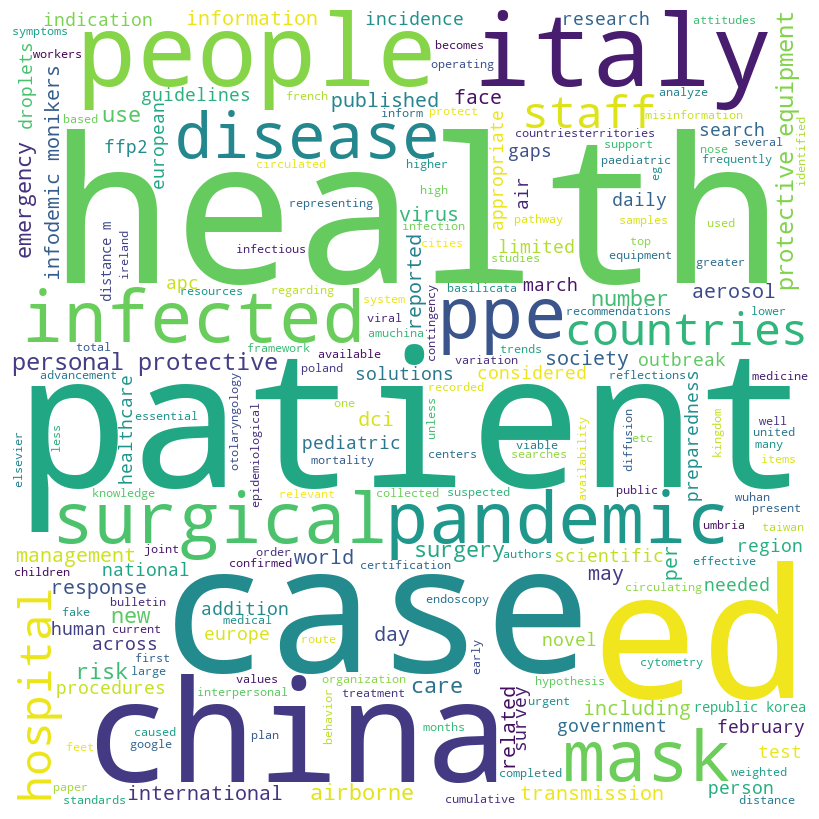

In [17]:
#Generate a wordcloud (word size refletcs word frequency in text) with the formated abstracts
wordcloud = WordCloud(width = 800, height = 800, 
                      background_color ='white',
                      min_font_size = 10).generate(concatenate)
#Plot wordcloud
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()